### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [ ]:
%reload_ext autoreload

In [ ]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter,
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Iteration 0: Loss = 0.8025177439705296
Iteration 1: Loss = 0.8002697020526331
Iteration 2: Loss = 0.7990610167054584
Iteration 3: Loss = 0.7974553399848046
Iteration 4: Loss = 0.7958358871639851
Iteration 5: Loss = 0.7946802863494642
Iteration 6: Loss = 0.7934111945106121
Iteration 7: Loss = 0.792168808666738
Iteration 8: Loss = 0.7912731471382993
Iteration 9: Loss = 0.7899597771085419


## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [ ]:
data = pd.read_csv('autos.csv')

In [ ]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

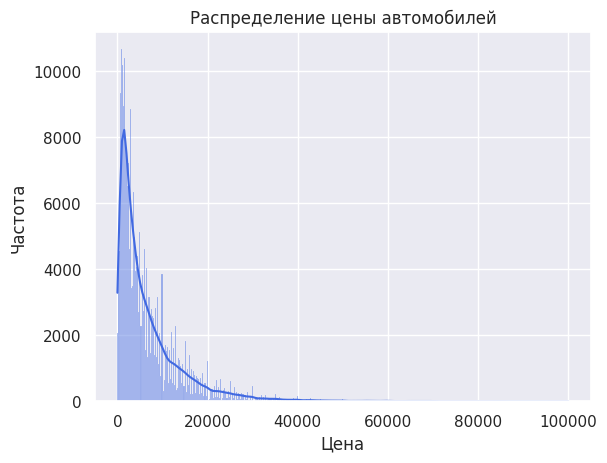

In [ ]:
sns.histplot(data['price'], kde=True, color='royalblue')
plt.title('Распределение цены автомобилей')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

In [ ]:
if data['price'].skew() > 1:
    data['price'] = np.log1p(data['price'])

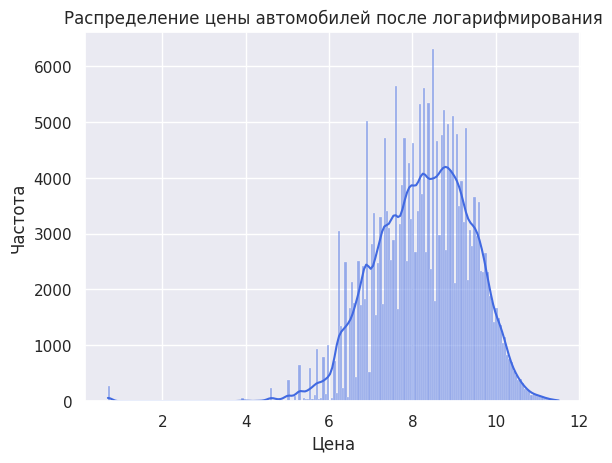

In [ ]:
sns.histplot(data['price'], kde=True, color='royalblue')
plt.title('Распределение цены автомобилей после логарифмирования')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

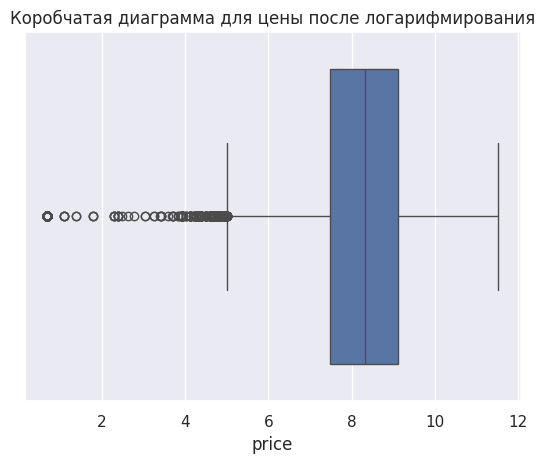

In [ ]:
sns.boxplot(x=data['price'])
plt.title('Коробчатая диаграмма для цены после логарифмирования')
plt.show()

In [ ]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['price'] >= (Q1 - 1.5 * IQR)) & (data['price'] <= (Q3 + 1.5 * IQR))]

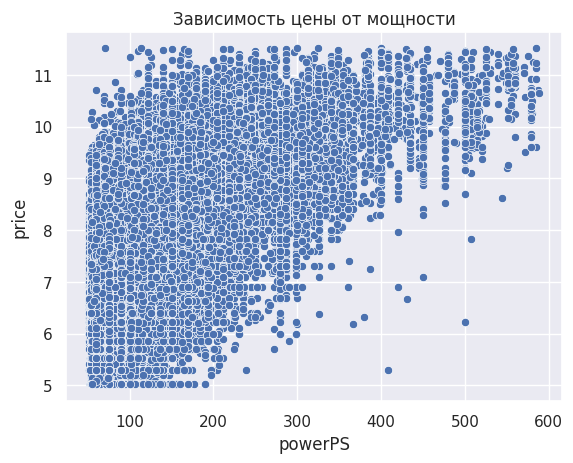

In [ ]:
sns.scatterplot(x=data['powerPS'], y=data['price'])
plt.title('Зависимость цены от мощности')
plt.show()

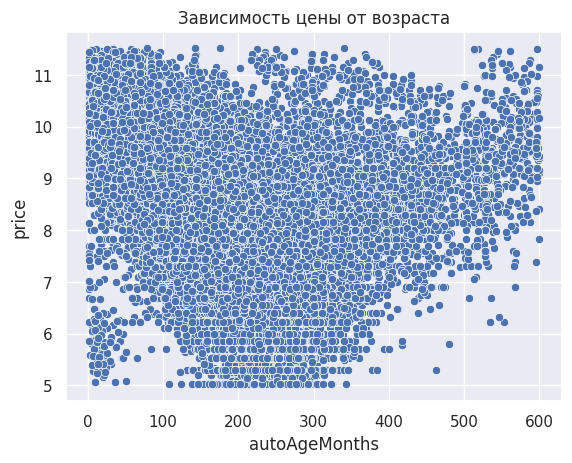

In [ ]:
sns.scatterplot(x=data['autoAgeMonths'], y=data['price'])
plt.title('Зависимость цены от возраста')
plt.show()

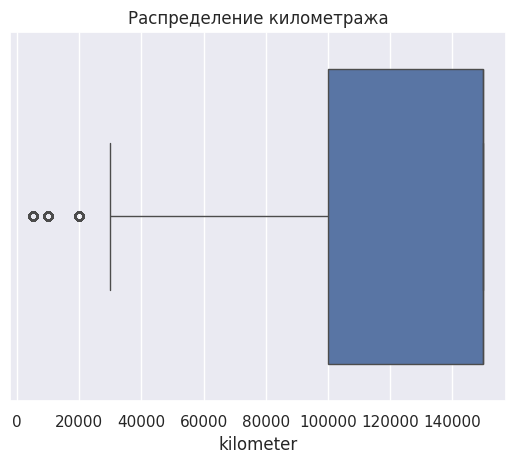

In [ ]:
sns.boxplot(x=data['kilometer'])
plt.title('Распределение километража')
plt.show()

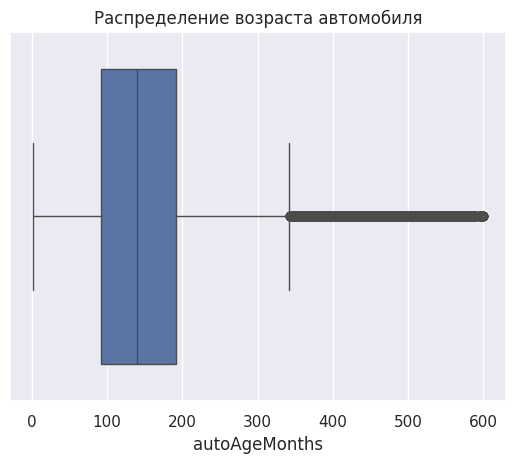

In [ ]:
sns.boxplot(x=data['autoAgeMonths'])
plt.title('Распределение возраста автомобиля')
plt.show()

In [ ]:
x = data[categorical + numeric]
y = data['price']
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
print(f"обучающая выборка: {x_train.shape[0]}")
print(f"валидационная выборка: {x_val.shape[0]}")
print(f"тестовая выборка: {x_test.shape[0]}")

обучающая выборка: 192319
валидационная выборка: 24040
тестовая выборка: 24040


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x_train = column_transformer.fit_transform(x_train)
x_val = column_transformer.transform(x_val)
x_test = column_transformer.transform(x_test)

In [ ]:
descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': x_train.shape[1]
    }
}

In [ ]:
x_train = x_train.toarray()
x_val = x_val.toarray()
x_test = x_test.toarray()

In [ ]:
regression = LinearRegression(descent_config=descent_config)
regression.fit(x_train, y_train)

Iteration 0: Loss = 33.46302611430525
Iteration 1: Loss = 33.296027670030156


In [ ]:
y_pred = regression.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print(f"MSE: {mse}")
print(f"MAE: {mae}")

MSE: 33.62247676356575
MAE: 5.372382571528634


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
model = Ridge(alpha=1.0)
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
print(f"средний R²: {scores.mean()}")

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R² на тесте: {r2}")

средний R²: 0.787467443451592
R² на тесте: 0.785752859629754


## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_train_dense = x_train.toarray() if hasattr(x_train, "toarray") else np.array(x_train)
x_val_dense = x_val.toarray() if hasattr(x_val, "toarray") else np.array(x_val)
y_train_np = y_train.values if hasattr(y_train, "values") else np.array(y_train)
y_val_np = y_val.values if hasattr(y_val, "values") else np.array(y_val)

In [ ]:
methods = ['full', 'adam', 'stochastic', 'momentum']
lambdas = np.logspace(-4, 0, 10)
results = {}

In [ ]:
iteration_errors_train = {method: [] for method in methods}
iteration_errors_val = {method: [] for method in methods}

Iteration 0: Loss = 32.77717408459077
Iteration 0: Loss = 32.892124437595996
Iteration 0: Loss = 33.40051245606285
Iteration 0: Loss = 35.337022157267945
Iteration 1: Loss = 34.957232601901225
Iteration 2: Loss = 34.63193468419048
Iteration 3: Loss = 34.34376530909636
Iteration 4: Loss = 34.08296761495948
Iteration 5: Loss = 33.84341895857156
Iteration 6: Loss = 33.620980849711756
Iteration 7: Loss = 33.41270188379136
Iteration 8: Loss = 33.216390081134236
Iteration 9: Loss = 33.0303648669277
Iteration 10: Loss = 32.85330431946207
Iteration 11: Loss = 32.68414647107916
Iteration 12: Loss = 32.52202298579387
Iteration 0: Loss = 35.53436386039689
Iteration 1: Loss = 34.47313394928463
Iteration 2: Loss = 33.582138202582364
Iteration 3: Loss = 32.806440262543866
Iteration 4: Loss = 32.11528653587856
Iteration 5: Loss = 31.489439488381507
Iteration 6: Loss = 30.915932315732256
Iteration 7: Loss = 30.385541425176665
Iteration 8: Loss = 29.891433098345324
Iteration 9: Loss = 29.42838003161867

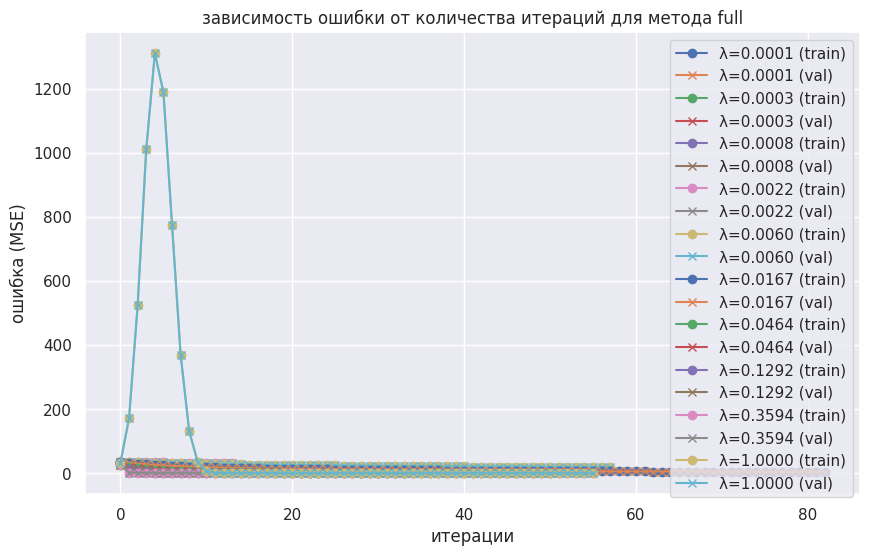

Iteration 0: Loss = 29.51777227797669
Iteration 0: Loss = 33.25450024636686
Iteration 0: Loss = 30.034770766571455
Iteration 0: Loss = 24.26445025896985
Iteration 1: Loss = 24.18917702868561
Iteration 2: Loss = 24.124092159563432
Iteration 3: Loss = 24.06596153076806
Iteration 4: Loss = 24.012965486661113
Iteration 5: Loss = 23.96396104919726
Iteration 6: Loss = 23.91817502433692
Iteration 7: Loss = 23.875055615460756
Iteration 8: Loss = 23.834192748288547
Iteration 9: Loss = 23.7952718353843
Iteration 10: Loss = 23.758045285651008
Iteration 11: Loss = 23.72231408718005
Iteration 12: Loss = 23.687915426633904
Iteration 13: Loss = 23.654714090692003
Iteration 0: Loss = 22.710503969831834
Iteration 1: Loss = 22.508632288544977
Iteration 2: Loss = 22.334609135784728
Iteration 3: Loss = 22.17960115951008
Iteration 4: Loss = 22.038638548140323
Iteration 5: Loss = 21.90859961560294
Iteration 6: Loss = 21.787372553919987
Iteration 7: Loss = 21.67345015984698
Iteration 8: Loss = 21.56571223730

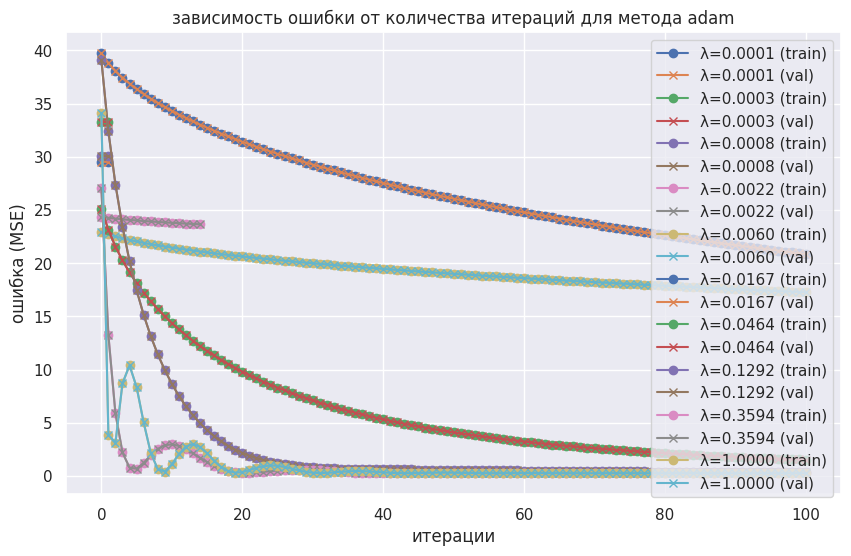

Iteration 0: Loss = 23.99014676877843
Iteration 0: Loss = 24.828476425793028
Iteration 0: Loss = 32.222947184486536
Iteration 0: Loss = 32.01561723193131
Iteration 1: Loss = 31.65965386842595
Iteration 2: Loss = 31.35521693687264
Iteration 3: Loss = 31.113494442135767
Iteration 4: Loss = 30.853743534903337
Iteration 5: Loss = 30.62846875964444
Iteration 6: Loss = 30.425486830484804
Iteration 7: Loss = 30.244323424681674
Iteration 8: Loss = 30.027841650399782
Iteration 9: Loss = 29.849151895413552
Iteration 10: Loss = 29.679324687312768
Iteration 11: Loss = 29.51062847383344
Iteration 12: Loss = 29.360118624233994
Iteration 0: Loss = 36.443613623272476
Iteration 1: Loss = 35.54140358685135
Iteration 2: Loss = 34.70036334007434
Iteration 3: Loss = 33.83438489399588
Iteration 4: Loss = 33.036450915501646
Iteration 5: Loss = 32.41334508408763
Iteration 6: Loss = 31.63789728856575
Iteration 7: Loss = 31.072422631796673
Iteration 8: Loss = 30.48733169782305
Iteration 9: Loss = 29.97220003625

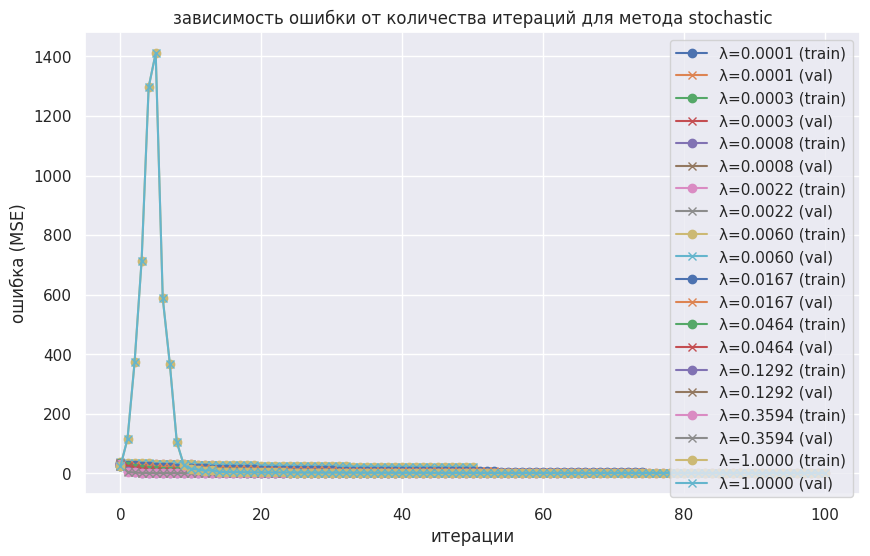

Iteration 0: Loss = 30.86951881917337
Iteration 0: Loss = 25.88699067153419
Iteration 0: Loss = 28.460605466810637
Iteration 0: Loss = 26.47934596250141
Iteration 0: Loss = 41.56825309956213
Iteration 0: Loss = 32.56603598077418
Iteration 1: Loss = 32.039158446233564
Iteration 2: Loss = 31.397214481101066
Iteration 3: Loss = 30.680527835771688
Iteration 4: Loss = 29.915917421101707
Iteration 5: Loss = 29.12239338958921
Iteration 6: Loss = 28.313906083956834
Iteration 7: Loss = 27.500886939429332
Iteration 8: Loss = 26.691205036227853
Iteration 9: Loss = 25.890805446868658
Iteration 10: Loss = 25.10415814006801
Iteration 11: Loss = 24.33458603673444
Iteration 12: Loss = 23.584511681671195
Iteration 13: Loss = 22.855646709050657
Iteration 14: Loss = 22.149139708832084
Iteration 15: Loss = 21.46569301801661
Iteration 16: Loss = 20.805655796936282
Iteration 17: Loss = 20.169098697723626
Iteration 18: Loss = 19.555874050392603
Iteration 19: Loss = 18.965664532068605
Iteration 20: Loss = 18.

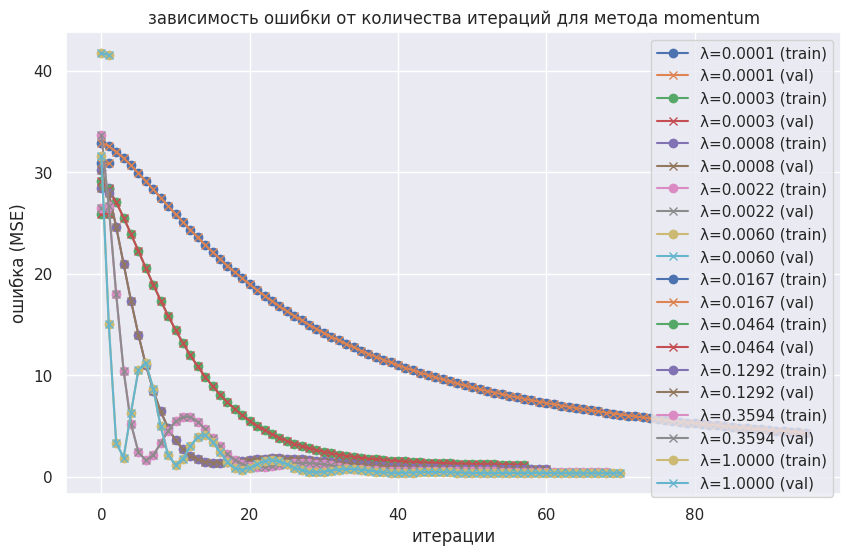

In [ ]:
for method in methods:
    train_mses = []
    val_mses = []
    train_r2s = []
    val_r2s = []
    iterations = []

    for λ in lambdas:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': x_train_dense.shape[1],
                'lambda_': λ,
                **({'batch_size': 32} if method == 'stochastic' else {})
            }
        }
        model = LinearRegression(descent_config=descent_config,tolerance=1e-4,max_iter=100)
        model.fit(x_train_dense, y_train_np)
        train_pred = model.predict(x_train_dense)
        val_pred = model.predict(x_val_dense)
        train_mses.append(mean_squared_error(y_train_np, train_pred))
        val_mses.append(mean_squared_error(y_val_np, val_pred))
        train_r2s.append(r2_score(y_train_np, train_pred))
        val_r2s.append(r2_score(y_val_np, val_pred))
        iterations.append(len(model.loss_history))
        iteration_errors_train[method].append(model.loss_history)
        iteration_errors_val[method].append(model.loss_history)

    results[method] = {
        'train_mses': train_mses,
        'val_mses': val_mses,
        'train_r2s': train_r2s,
        'val_r2s': val_r2s,
        'iterations': iterations
    }
    plt.figure(figsize=(10, 6))
    for i, λ in enumerate(lambdas):
        plt.plot(iteration_errors_train[method][i], label=f'λ={λ:.4f} (train)', marker='o')
        plt.plot(iteration_errors_val[method][i], label=f'λ={λ:.4f} (val)', marker='x')
    plt.xlabel('итерации')
    plt.ylabel('ошибка (MSE)')
    plt.title(f'зависимость ошибки от количества итераций для метода {method}')
    plt.legend()
    plt.show()

full - Лучшее λ: 1.0000, MSE на train: 0.3702, MSE на val: 0.3729
full - R2 на train: 0.7001, R2 на val: 0.6995
adam - Лучшее λ: 1.0000, MSE на train: 0.2637, MSE на val: 0.2632
adam - R2 на train: 0.7864, R2 на val: 0.7879
stochastic - Лучшее λ: 0.3594, MSE на train: 0.4552, MSE на val: 0.4590
stochastic - R2 на train: 0.6312, R2 на val: 0.6301
momentum - Лучшее λ: 1.0000, MSE на train: 0.3738, MSE на val: 0.3717
momentum - R2 на train: 0.6972, R2 на val: 0.7004


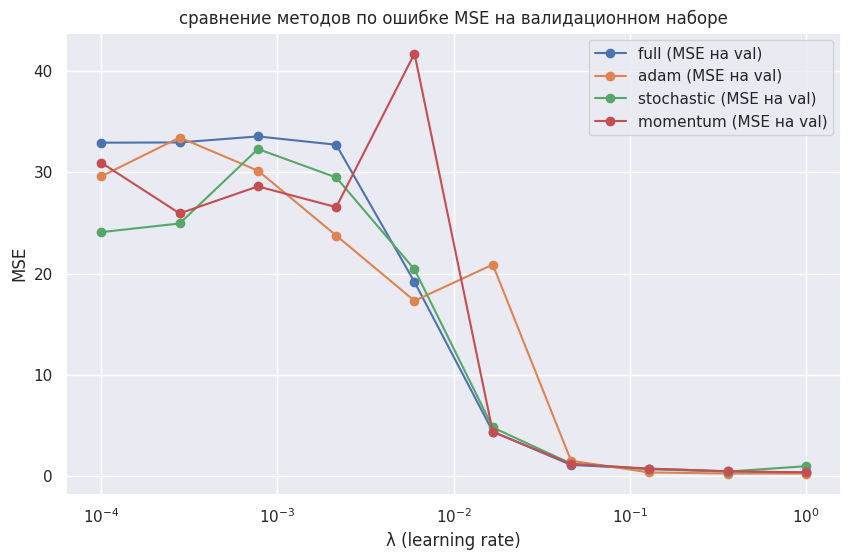

метод: full
  - лучшее λ: 1.0000
  - MSE на train: 0.3702, MSE на val: 0.3729
  - R2 на train: 0.7001, R2 на val: 0.6995
  - этот метод показал наилучший результат по λ=1.0000

метод: adam
  - лучшее λ: 1.0000
  - MSE на train: 0.2637, MSE на val: 0.2632
  - R2 на train: 0.7864, R2 на val: 0.7879
  - этот метод показал наилучший результат по λ=1.0000

метод: stochastic
  - лучшее λ: 0.3594
  - MSE на train: 0.4552, MSE на val: 0.4590
  - R2 на train: 0.6312, R2 на val: 0.6301
  - этот метод показал наилучший результат по λ=0.3594

метод: momentum
  - лучшее λ: 1.0000
  - MSE на train: 0.3738, MSE на val: 0.3717
  - R2 на train: 0.6972, R2 на val: 0.7004
  - этот метод показал наилучший результат по λ=1.0000



In [ ]:
plt.figure(figsize=(10, 6))
for method in methods:
    best_lambda_idx = np.argmin(results[method]['val_mses'])
    best_lambda = lambdas[best_lambda_idx]
    best_mse_train = results[method]['train_mses'][best_lambda_idx]
    best_mse_val = results[method]['val_mses'][best_lambda_idx]
    best_r2_train = results[method]['train_r2s'][best_lambda_idx]
    best_r2_val = results[method]['val_r2s'][best_lambda_idx]

    plt.plot(lambdas, results[method]['val_mses'], label=f'{method} (MSE на val)', marker='o')
    print(f"{method} - Лучшее λ: {best_lambda:.4f}, MSE на train: {best_mse_train:.4f}, MSE на val: {best_mse_val:.4f}")
    print(f"{method} - R2 на train: {best_r2_train:.4f}, R2 на val: {best_r2_val:.4f}")
plt.xscale('log')
plt.xlabel('λ (learning rate)')
plt.ylabel('MSE')
plt.title('сравнение методов по ошибке MSE на валидационном наборе')
plt.legend()
plt.show()

for method in methods:
    best_lambda_idx = np.argmin(results[method]['val_mses'])
    best_lambda = lambdas[best_lambda_idx]
    best_mse_train = results[method]['train_mses'][best_lambda_idx]
    best_mse_val = results[method]['val_mses'][best_lambda_idx]
    best_r2_train = results[method]['train_r2s'][best_lambda_idx]
    best_r2_val = results[method]['val_r2s'][best_lambda_idx]
    print(f"метод: {method}")
    print(f"  - лучшее λ: {best_lambda:.4f}")
    print(f"  - MSE на train: {best_mse_train:.4f}, MSE на val: {best_mse_val:.4f}")
    print(f"  - R2 на train: {best_r2_train:.4f}, R2 на val: {best_r2_val:.4f}")
    print(f"  - этот метод показал наилучший результат по λ={best_lambda:.4f}")
    print()

Лучший - Adam

### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

In [ ]:
results = {}

Iteration 0: Loss = 36.55858046495736
Iteration 0: Loss = 37.877830412818014
Iteration 0: Loss = 34.59243752326869
Iteration 0: Loss = 31.59670184512187
Iteration 1: Loss = 31.25075517773523
Iteration 2: Loss = 30.954469353599954
Iteration 3: Loss = 30.69202004441009
Iteration 4: Loss = 30.454515166486928
Iteration 5: Loss = 30.23637479115899
Iteration 6: Loss = 30.033827293244467
Iteration 7: Loss = 29.84418291840146
Iteration 8: Loss = 29.665444023413123
Iteration 9: Loss = 29.496079037861037
Iteration 10: Loss = 29.334883251206602
Iteration 11: Loss = 29.18088886209267
Iteration 0: Loss = 33.56255895037718
Iteration 1: Loss = 32.56334258117288
Iteration 2: Loss = 31.72420433216129
Iteration 3: Loss = 30.9934947920127
Iteration 4: Loss = 30.34229887323369
Iteration 5: Loss = 29.752528272453123
Iteration 6: Loss = 29.211990307837926
Iteration 7: Loss = 28.71201170634642
Iteration 8: Loss = 28.246166245893185
Iteration 9: Loss = 27.809538157052312
Iteration 10: Loss = 27.39826918040861

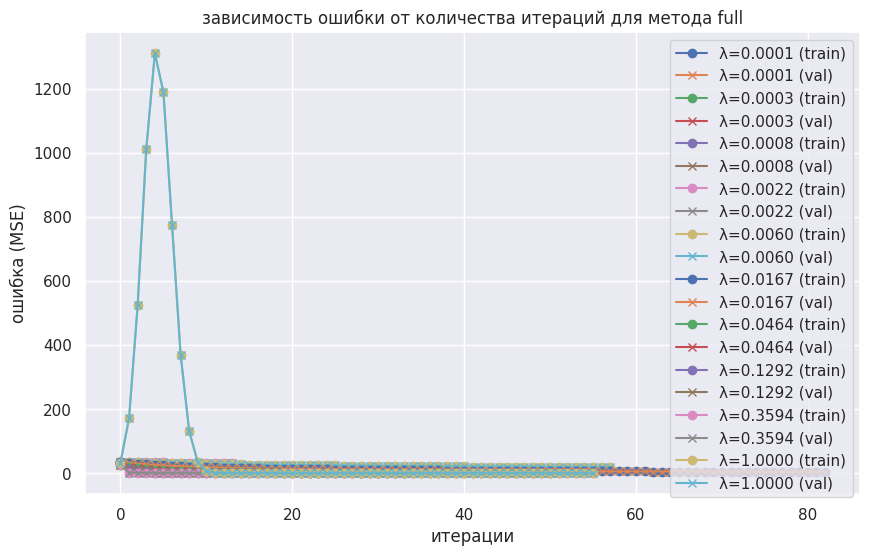

Iteration 0: Loss = 37.06128067723183
Iteration 0: Loss = 40.80510230560256
Iteration 0: Loss = 23.244694505757998
Iteration 0: Loss = 30.488611445404214
Iteration 1: Loss = 30.403286550298546
Iteration 2: Loss = 30.32949877662902
Iteration 3: Loss = 30.26358571161323
Iteration 4: Loss = 30.20348671878526
Iteration 5: Loss = 30.147907452795575
Iteration 6: Loss = 30.095972324949862
Iteration 7: Loss = 30.04705646563588
Iteration 8: Loss = 30.00069549753869
Iteration 9: Loss = 29.956533176873187
Iteration 10: Loss = 29.914289129633197
Iteration 11: Loss = 29.873737995261695
Iteration 12: Loss = 29.834695406312658
Iteration 13: Loss = 29.797008251064454
Iteration 0: Loss = 29.771454153738105
Iteration 1: Loss = 29.53614518759546
Iteration 2: Loss = 29.333180653378417
Iteration 3: Loss = 29.15229971214255
Iteration 4: Loss = 28.987729391252785
Iteration 5: Loss = 28.835843528608375
Iteration 6: Loss = 28.694189065251212
Iteration 7: Loss = 28.56101527412326
Iteration 8: Loss = 28.43502099

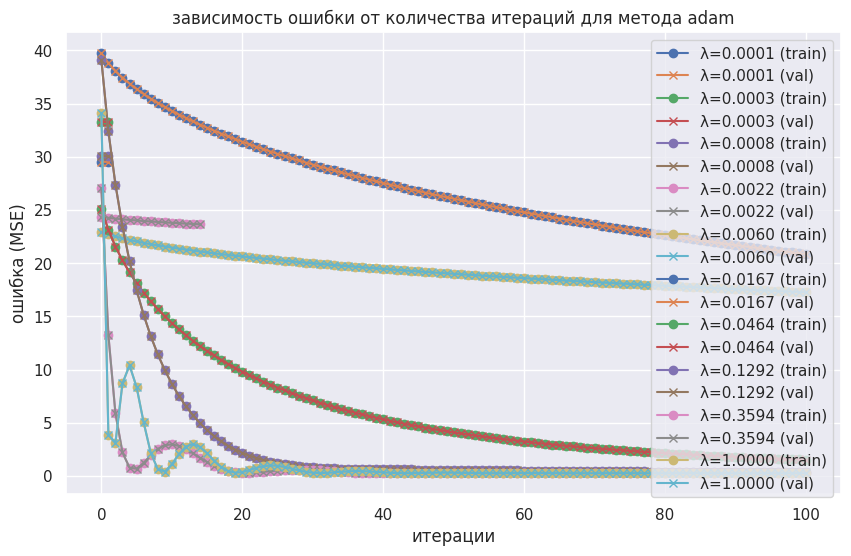

Iteration 0: Loss = 28.460514419302267
Iteration 0: Loss = 29.980411570354136
Iteration 0: Loss = 30.881667347788373
Iteration 0: Loss = 32.985576217457655
Iteration 1: Loss = 32.65531715704552
Iteration 2: Loss = 32.38245522290288
Iteration 3: Loss = 32.1237544080139
Iteration 4: Loss = 31.8562283884375
Iteration 5: Loss = 31.60589157249097
Iteration 6: Loss = 31.403118115026665
Iteration 7: Loss = 31.197275357402614
Iteration 8: Loss = 31.023673493539643
Iteration 9: Loss = 30.827032324380568
Iteration 10: Loss = 30.642688678721736
Iteration 11: Loss = 30.463535858536
Iteration 12: Loss = 30.29645419662187
Iteration 13: Loss = 30.14789680503437
Iteration 0: Loss = 31.969030841558485
Iteration 1: Loss = 31.212837476540578
Iteration 2: Loss = 30.266802529907537
Iteration 3: Loss = 29.634486985817812
Iteration 4: Loss = 28.892492538389845
Iteration 5: Loss = 28.345357934254853
Iteration 6: Loss = 27.76474176823063
Iteration 7: Loss = 27.293942001156868
Iteration 8: Loss = 26.77545460370

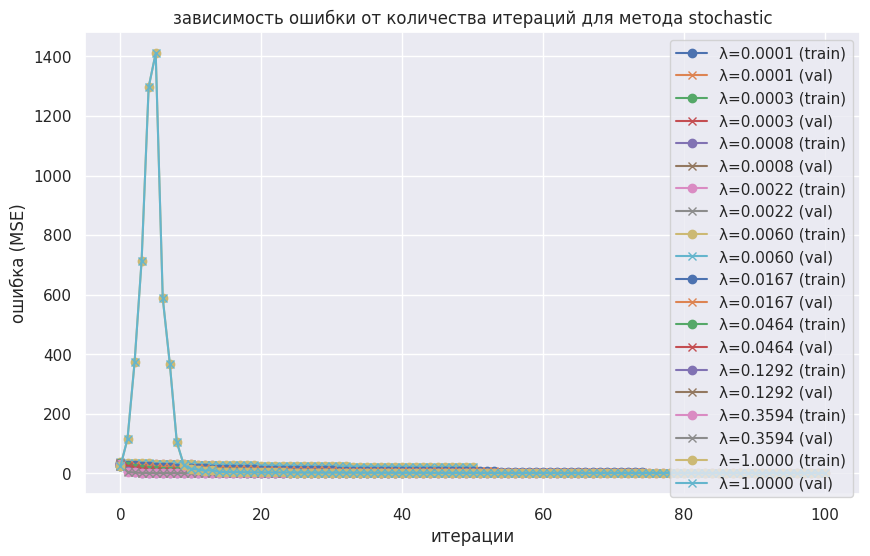

Iteration 0: Loss = 23.1569221961281
Iteration 0: Loss = 39.347838986575574
Iteration 0: Loss = 36.0850926689515
Iteration 0: Loss = 29.381616647509937
Iteration 0: Loss = 27.96067049104602
Iteration 0: Loss = 38.13032633293175
Iteration 1: Loss = 37.50445652660079
Iteration 2: Loss = 36.741955374371344
Iteration 3: Loss = 35.89074855096676
Iteration 4: Loss = 34.98271283052887
Iteration 5: Loss = 34.04044343903702
Iteration 6: Loss = 33.080520461489165
Iteration 7: Loss = 32.11534011387084
Iteration 8: Loss = 31.154251758513666
Iteration 9: Loss = 30.204316819472368
Iteration 10: Loss = 29.270842562760713
Iteration 11: Loss = 28.357772236432172
Iteration 12: Loss = 27.46797845992427
Iteration 13: Loss = 26.60348859382563
Iteration 14: Loss = 25.765660639008804
Iteration 15: Loss = 24.955322174681996
Iteration 16: Loss = 24.17288108578344
Iteration 17: Loss = 23.41841439039798
Iteration 18: Loss = 22.69173983568264
Iteration 19: Loss = 21.99247378976044
Iteration 20: Loss = 21.32007814

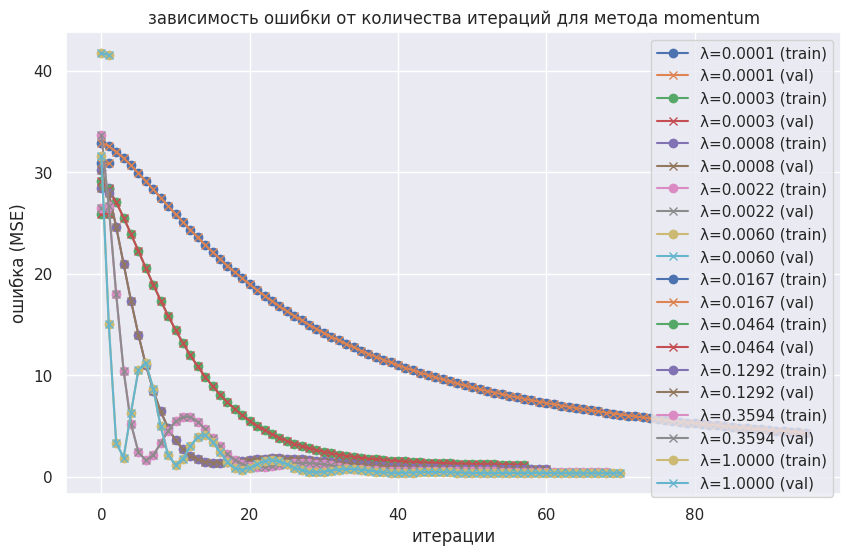

full - Лучшее λ: 1.0000, MSE на train: 0.3588, MSE на val: 0.3559
full - R2 на train: 0.7093, R2 на val: 0.7131
adam - Лучшее λ: 1.0000, MSE на train: 0.2634, MSE на val: 0.2626
adam - R2 на train: 0.7866, R2 на val: 0.7884
stochastic - Лучшее λ: 0.3594, MSE на train: 0.4025, MSE на val: 0.4026
stochastic - R2 на train: 0.6739, R2 на val: 0.6755
momentum - Лучшее λ: 1.0000, MSE на train: 0.3660, MSE на val: 0.3663
momentum - R2 на train: 0.7035, R2 на val: 0.7048


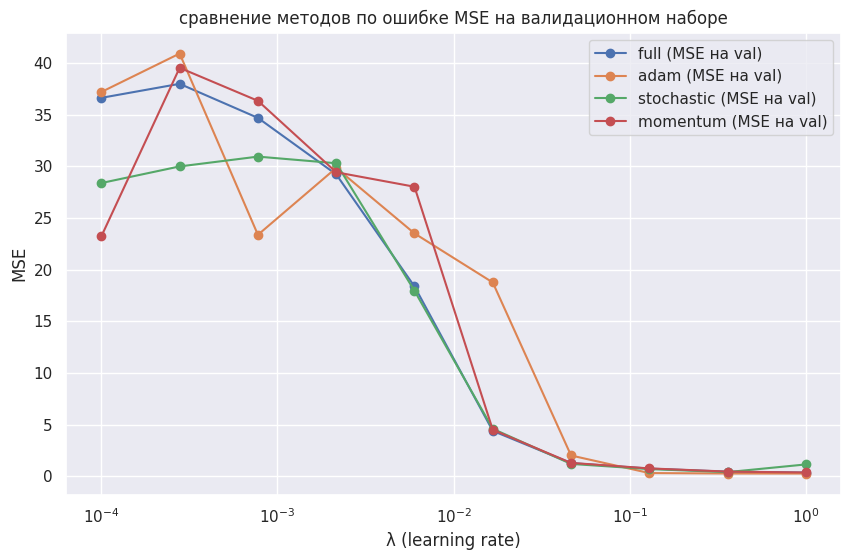

Метод: full
  - Лучшее λ: 1.0000
  - MSE на train: 0.3588, MSE на val: 0.3559
  - R2 на train: 0.7093, R2 на val: 0.7131
  - Этот метод показал наилучший результат по λ=1.0000

Метод: adam
  - Лучшее λ: 1.0000
  - MSE на train: 0.2634, MSE на val: 0.2626
  - R2 на train: 0.7866, R2 на val: 0.7884
  - Этот метод показал наилучший результат по λ=1.0000

Метод: stochastic
  - Лучшее λ: 0.3594
  - MSE на train: 0.4025, MSE на val: 0.4026
  - R2 на train: 0.6739, R2 на val: 0.6755
  - Этот метод показал наилучший результат по λ=0.3594

Метод: momentum
  - Лучшее λ: 1.0000
  - MSE на train: 0.3660, MSE на val: 0.3663
  - R2 на train: 0.7035, R2 на val: 0.7048
  - Этот метод показал наилучший результат по λ=1.0000



In [ ]:
for method in methods:
    train_mses = []
    val_mses = []
    train_r2s = []
    val_r2s = []
    iterations = []
    convergence_iterations = []
    for λ in lambdas:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': x_train_dense.shape[1],
                'lambda_': λ,
                **({'batch_size': 32} if method == 'stochastic' else {})
            }
        }
        model = LinearRegression(descent_config=descent_config,tolerance=1e-4,max_iter=100)
        model.fit(x_train_dense, y_train_np)
        convergence_iterations.append(len(model.loss_history))
        train_pred = model.predict(x_train_dense)
        val_pred = model.predict(x_val_dense)
        train_mses.append(mean_squared_error(y_train_np, train_pred))
        val_mses.append(mean_squared_error(y_val_np, val_pred))
        train_r2s.append(r2_score(y_train_np, train_pred))
        val_r2s.append(r2_score(y_val_np, val_pred))
        iterations.append(len(model.loss_history))
        iteration_errors_train[method].append(model.loss_history)
        iteration_errors_val[method].append(model.loss_history)

    results[method] = {
        'train_mses': train_mses,
        'val_mses': val_mses,
        'train_r2s': train_r2s,
        'val_r2s': val_r2s,
        'iterations': iterations
    }
    plt.figure(figsize=(10, 6))
    for i, λ in enumerate(lambdas):
        plt.plot(iteration_errors_train[method][i], label=f'λ={λ:.4f} (train)', marker='o')
        plt.plot(iteration_errors_val[method][i], label=f'λ={λ:.4f} (val)', marker='x')
    plt.xlabel('итерации')
    plt.ylabel('ошибка (MSE)')
    plt.title(f'зависимость ошибки от количества итераций для метода {method}')
    plt.legend()
    plt.show()

plt.figure(figsize=(10, 6))
for method in methods:
    best_lambda_idx = np.argmin(results[method]['val_mses'])
    best_lambda = lambdas[best_lambda_idx]
    best_mse_train = results[method]['train_mses'][best_lambda_idx]
    best_mse_val = results[method]['val_mses'][best_lambda_idx]
    best_r2_train = results[method]['train_r2s'][best_lambda_idx]
    best_r2_val = results[method]['val_r2s'][best_lambda_idx]
    best_iterations = convergence_iterations[best_lambda_idx]
    plt.plot(lambdas, results[method]['val_mses'], label=f'{method} (MSE на val)', marker='o')
    print(f"{method} - Лучшее λ: {best_lambda:.4f}, MSE на train: {best_mse_train:.4f}, MSE на val: {best_mse_val:.4f}")
    print(f"{method} - R2 на train: {best_r2_train:.4f}, R2 на val: {best_r2_val:.4f}")
plt.xscale('log')
plt.xlabel('λ (learning rate)')
plt.ylabel('MSE')
plt.title('сравнение методов по ошибке MSE на валидационном наборе')
plt.legend()
plt.show()

for method in methods:
    best_lambda_idx = np.argmin(results[method]['val_mses'])
    best_lambda = lambdas[best_lambda_idx]
    best_mse_train = results[method]['train_mses'][best_lambda_idx]
    best_mse_val = results[method]['val_mses'][best_lambda_idx]
    best_r2_train = results[method]['train_r2s'][best_lambda_idx]
    best_r2_val = results[method]['val_r2s'][best_lambda_idx]
    best_iterations = convergence_iterations[best_lambda_idx]
    print(f"Метод: {method}")
    print(f"  - Лучшее λ: {best_lambda:.4f}")
    print(f"  - MSE на train: {best_mse_train:.4f}, MSE на val: {best_mse_val:.4f}")
    print(f"  - R2 на train: {best_r2_train:.4f}, R2 на val: {best_r2_val:.4f}")
    print(f"  - Этот метод показал наилучший результат по λ={best_lambda:.4f}")
    print()

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [ ]:
import numpy as np
import time
from joblib import Parallel, delayed

In [ ]:
batch_sizes = np.arange(5, 500, 10)
k = 1
results_batch = {
    'batch_size': [],
    'avg_iterations': [],
    'avg_time': []
}

In [ ]:
def train_and_measure(batch_size, x_train_dense, y_train_np):
    iterations_list = []
    times_list = []
    for _ in range(k):
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': x_train_dense.shape[1],
                'lambda_': 0.01,
                'batch_size': batch_size
            }
        }
        model = LinearRegression(descent_config=descent_config, tolerance=1e-4, max_iter=30)
        start_time = time.time()
        model.fit(x_train_dense, y_train_np)
        end_time = time.time()
        elapsed_time = end_time - start_time
        times_list.append(elapsed_time)
        iterations_list.append(len(model.loss_history))

    return batch_size, np.mean(iterations_list), np.mean(times_list)
x_train_dense = x_train.toarray() if hasattr(x_train, "toarray") else np.array(x_train)
y_train_np = y_train.values if hasattr(y_train, "values") else np.array(y_train)
results = Parallel(n_jobs=8)(delayed(train_and_measure)(batch_size, x_train_dense, y_train_np) for batch_size in batch_sizes)
for batch_size, avg_iter, avg_time in results:
    results_batch['batch_size'].append(batch_size)
    results_batch['avg_iterations'].append(avg_iter)
    results_batch['avg_time'].append(avg_time)

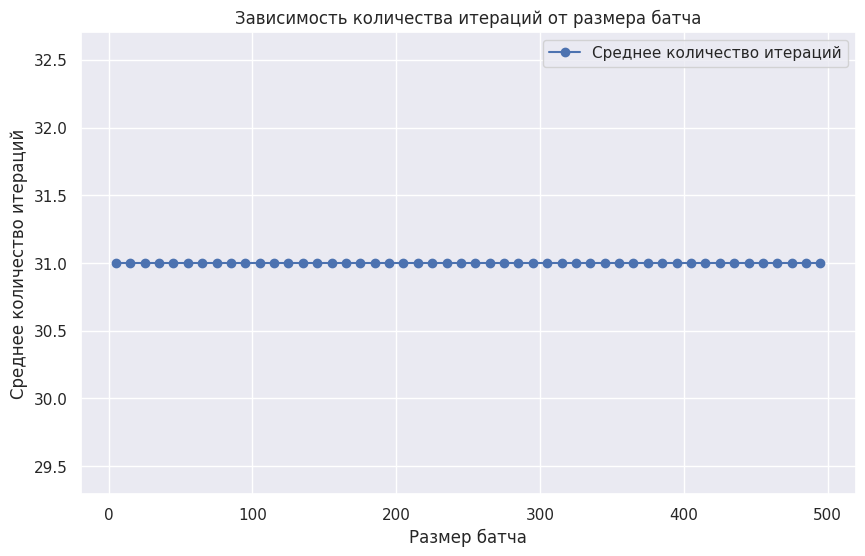

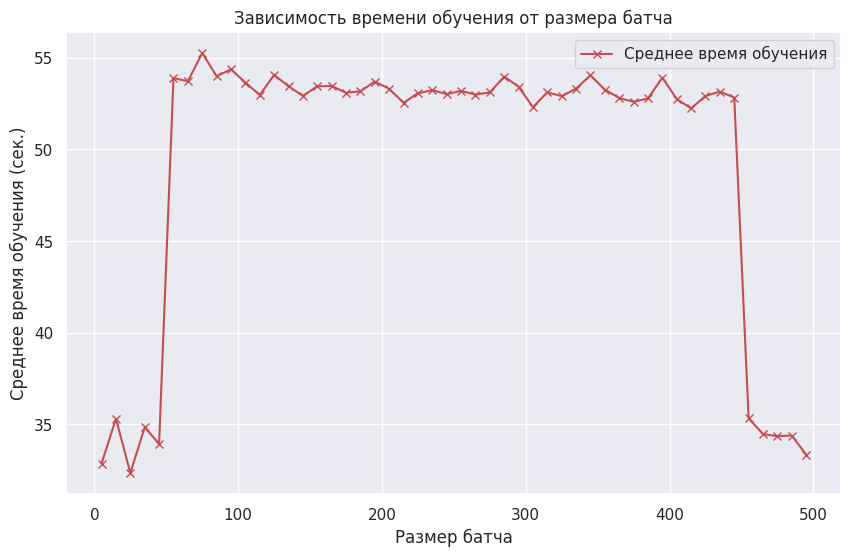

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results_batch['batch_size'], results_batch['avg_iterations'], marker='o', color='b', label='Среднее количество итераций')
plt.xlabel('Размер батча')
plt.ylabel('Среднее количество итераций')
plt.title('Зависимость количества итераций от размера батча')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(results_batch['batch_size'], results_batch['avg_time'], marker='x', color='r', label='Среднее время обучения')
plt.xlabel('Размер батча')
plt.ylabel('Среднее время обучения (сек.)')
plt.title('Зависимость времени обучения от размера батча')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
for batch_size, avg_iter, avg_time in zip(results_batch['batch_size'], results_batch['avg_iterations'], results_batch['avg_time']):
    print(f"batch Size: {batch_size}, среднее количество итераций: {avg_iter:.2f}, среднее время обучения: {avg_time:.2f} секунд")

batch Size: 5, среднее количество итераций: 31.00, среднее время обучения: 32.86 секунд
batch Size: 15, среднее количество итераций: 31.00, среднее время обучения: 35.31 секунд
batch Size: 25, среднее количество итераций: 31.00, среднее время обучения: 32.34 секунд
batch Size: 35, среднее количество итераций: 31.00, среднее время обучения: 34.84 секунд
batch Size: 45, среднее количество итераций: 31.00, среднее время обучения: 33.93 секунд
batch Size: 55, среднее количество итераций: 31.00, среднее время обучения: 53.90 секунд
batch Size: 65, среднее количество итераций: 31.00, среднее время обучения: 53.72 секунд
batch Size: 75, среднее количество итераций: 31.00, среднее время обучения: 55.26 секунд
batch Size: 85, среднее количество итераций: 31.00, среднее время обучения: 54.00 секунд
batch Size: 95, среднее количество итераций: 31.00, среднее время обучения: 54.37 секунд
batch Size: 105, среднее количество итераций: 31.00, среднее время обучения: 53.65 секунд
batch Size: 115, сред

In [ ]:
avg_iterations = results_batch['avg_iterations']
avg_times = results_batch['avg_time']
optimal_batch_size = batch_sizes[np.argmin(avg_times)]
print(f"\nоптимальный размер батча для минимизации времени обучения: {optimal_batch_size}")
optimal_batch_size_iterations = batch_sizes[np.argmin(avg_iterations)]
print(f"оптимальный размер батча для минимизации количества итераций: {optimal_batch_size_iterations}")


оптимальный размер батча для минимизации времени обучения: 25
оптимальный размер батча для минимизации количества итераций: 5


╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lambdas = np.logspace(-4, 0, 5)
mus = np.logspace(-5, 0, 5)
methods = ['full', 'stochastic', 'momentum', 'adam']

In [ ]:
results_reg = {method: {
    'lambdas': [],
    'mus': [],
    'train_mses': [],
    'val_mses': [],
    'train_r2s': [],
    'val_r2s': [],
    'iterations': []
} for method in methods}
lambda_values = np.logspace(-4, 0, 5)
mu_values = np.logspace(-5, 0, 5)
iteration_errors_train = {method: [] for method in methods}
iteration_errors_val = {method: [] for method in methods}
for method in methods:
    for lambda_ in lambdas:
        for mu in mus:
            descent_config = {
                'descent_name': method,
                'regularized': True,
                'kwargs': {
                    'dimension': x_train_dense.shape[1],
                    'lambda_': lambda_,
                    'mu': mu
                }
            }
            model = LinearRegression(descent_config=descent_config, tolerance=1e-4, max_iter=50)
            model.fit(x_train_dense, y_train_np)
            train_pred = model.predict(x_train_dense)
            val_pred = model.predict(x_val_dense)
            train_mse = mean_squared_error(y_train_np, train_pred)
            val_mse = mean_squared_error(y_val_np, val_pred)
            train_r2 = r2_score(y_train_np, train_pred)
            val_r2 = r2_score(y_val_np, val_pred)
            iterations = len(model.loss_history)
            results_reg[method]['lambdas'].append(lambda_)
            results_reg[method]['mus'].append(mu)
            results_reg[method]['train_mses'].append(train_mse)
            results_reg[method]['val_mses'].append(val_mse)
            results_reg[method]['train_r2s'].append(train_r2)
            results_reg[method]['val_r2s'].append(val_r2)
            results_reg[method]['iterations'].append(iterations)

Iteration 0: Loss = 36.07730827970712
Iteration 0: Loss = 24.82998550809624
Iteration 0: Loss = 31.51132865855238
Iteration 0: Loss = 24.404667921871738
Iteration 0: Loss = 26.474744433664863
Iteration 0: Loss = 36.684177462331775
Iteration 1: Loss = 36.49496562908275
Iteration 2: Loss = 36.33195460586944
Iteration 0: Loss = 35.735160954131864
Iteration 1: Loss = 35.551608384321405
Iteration 2: Loss = 35.39346789088373
Iteration 0: Loss = 34.56877901655604
Iteration 1: Loss = 34.3944439784661
Iteration 2: Loss = 34.244243319951515
Iteration 0: Loss = 31.457550299674452
Iteration 1: Loss = 31.299130407748002
Iteration 0: Loss = 24.14799864205643
Iteration 1: Loss = 24.06388260336649
Iteration 2: Loss = 23.991430563101197
Iteration 3: Loss = 23.926932893222393
Iteration 0: Loss = 37.93432578249504
Iteration 1: Loss = 36.01005248122348
Iteration 2: Loss = 34.42931825907851
Iteration 3: Loss = 33.07898544468842
Iteration 4: Loss = 31.896102754768393
Iteration 5: Loss = 30.841500502109817
I

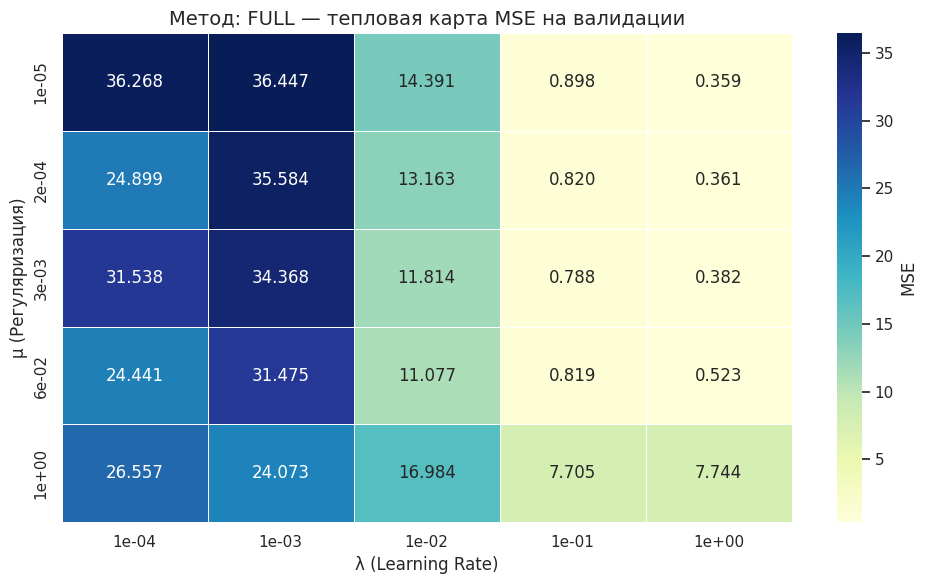

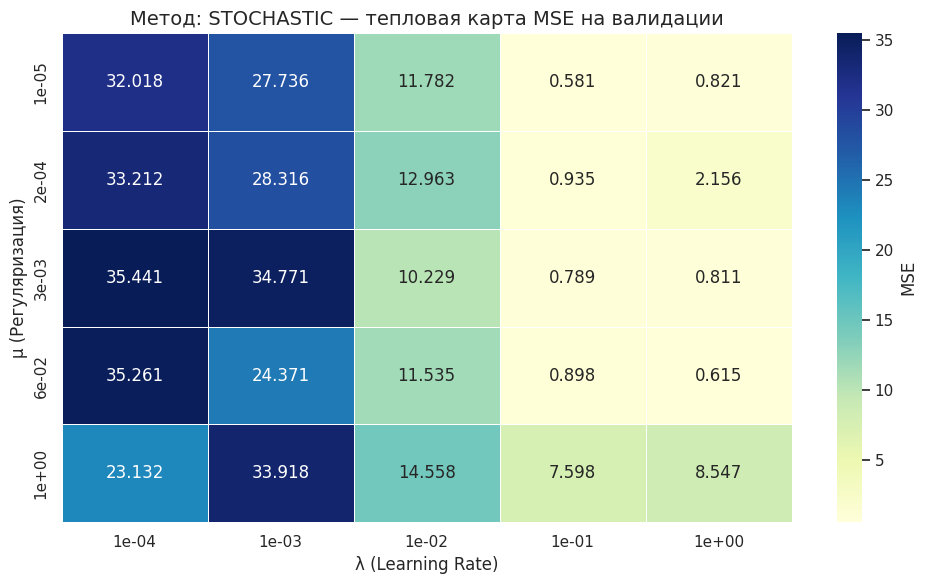

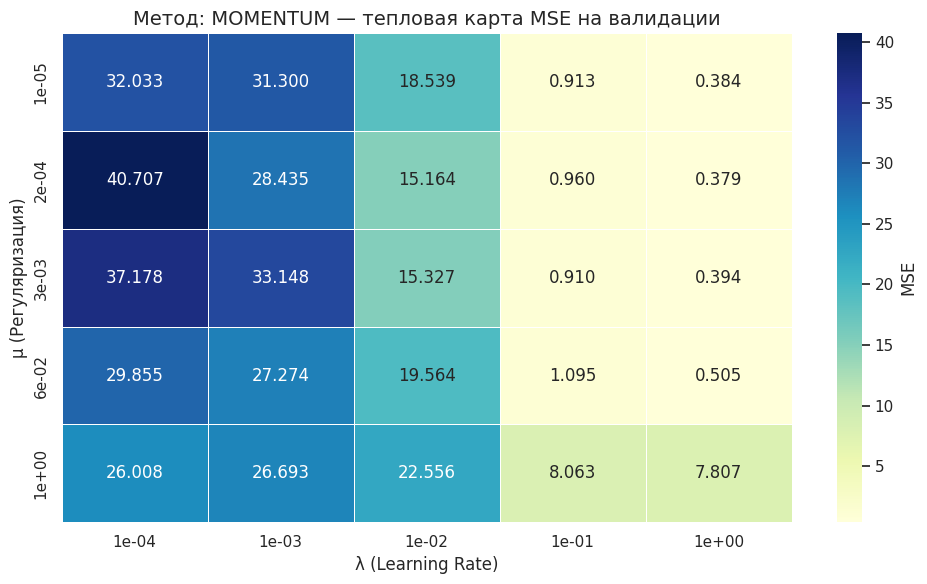

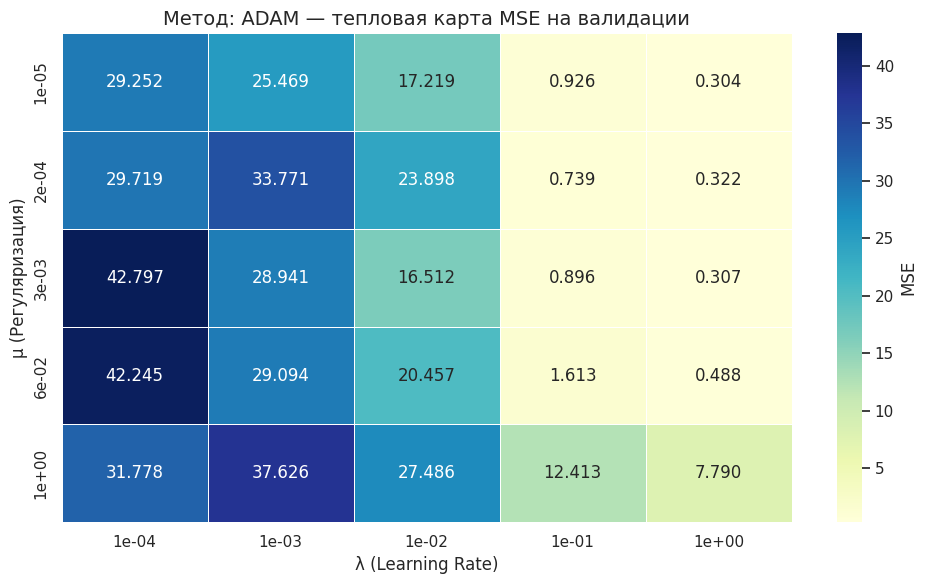

In [ ]:
for method in methods:
    lambdas = np.array(results_reg[method]['lambdas'])
    mus = np.array(results_reg[method]['mus'])
    val_mses = np.array(results_reg[method]['val_mses'])
    unique_lambdas = np.unique(lambdas)
    unique_mus = np.unique(mus)
    mse_matrix = np.full((len(unique_mus), len(unique_lambdas)), np.nan)
    for λ, μ, mse in zip(lambdas, mus, val_mses):
        i = np.where(unique_mus == μ)[0][0]
        j = np.where(unique_lambdas == λ)[0][0]
        mse_matrix[i, j] = mse
    df_heatmap = pd.DataFrame(mse_matrix, index=[f"{μ:.0e}" for μ in unique_mus],
                              columns=[f"{λ:.0e}" for λ in unique_lambdas])
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_heatmap, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'MSE'})
    plt.xlabel('λ (Learning Rate)', fontsize=12)
    plt.ylabel('μ (Регуляризация)', fontsize=12)
    plt.title(f"Метод: {method.upper()} — тепловая карта MSE на валидации", fontsize=14)
    plt.tight_layout()
    plt.show()

In [ ]:
for method in methods:
    val_mses = np.array(results_reg[method]['val_mses'])
    best_idx = np.argmin(val_mses)
    best_lambda = results_reg[method]['lambdas'][best_idx]
    best_mu = results_reg[method]['mus'][best_idx]
    best_train_mse = results_reg[method]['train_mses'][best_idx]
    best_val_mse = results_reg[method]['val_mses'][best_idx]
    best_train_r2 = results_reg[method]['train_r2s'][best_idx]
    best_val_r2 = results_reg[method]['val_r2s'][best_idx]
    best_iter = results_reg[method]['iterations'][best_idx]

    print(f"Метод: {method}")
    print(f"  - Лучшие параметры: λ={best_lambda:.4f}, μ={best_mu:.4f}")
    print(f"  - MSE: train={best_train_mse:.4f}, val={best_val_mse:.4f}")
    print(f"  - R²: train={best_train_r2:.4f}, val={best_val_r2:.4f}")
    print(f"  - Количество итераций: {best_iter}")
    print()

Метод: full
  - Лучшие параметры: λ=1.0000, μ=0.0000
  - MSE: train=0.3645, val=0.3590
  - R²: train=0.7047, val=0.7107
  - Количество итераций: 51

Метод: stochastic
  - Лучшие параметры: λ=0.1000, μ=0.0000
  - MSE: train=0.5836, val=0.5809
  - R²: train=0.5271, val=0.5318
  - Количество итераций: 40

Метод: momentum
  - Лучшие параметры: λ=1.0000, μ=0.0002
  - MSE: train=0.3780, val=0.3794
  - R²: train=0.6938, val=0.6942
  - Количество итераций: 51

Метод: adam
  - Лучшие параметры: λ=1.0000, μ=0.0000
  - MSE: train=0.3051, val=0.3038
  - R²: train=0.7528, val=0.7552
  - Количество итераций: 51



Регуляризация (L2) позволяет уменьшить переобучение и улучшить обобщающие способности модели. На основе эксперимента видно, что оптимальные значения параметров (λ и μ) зависят от метода градиентного спуска. Например, для метода full оптимальное сочетание может быть λ ≈ 1.0000 и μ ≈ 0.0002, что дает лучшую производительность на валидационной выборке. Сравнение методов показывает, что метод Adam продемонстрировал наилучшее качество предсказаний по метрике R², в то время как метод Full показал наименьшее значение ошибки (MSE) и быструю сходимость, делая его оптимальным выбором в задачах, где важна минимизация ошибки.

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from descents import LossFunction

In [ ]:
methods = ['full', 'stochastic', 'momentum', 'adam']
lambda_values = np.logspace(-4, -1, 5)

In [ ]:
results_logcosh = {
    method: {
        'lambdas': [],
        'train_mses': [],
        'val_mses': [],
        'train_r2s': [],
        'val_r2s': [],
        'iterations': [],
        'loss_curves': []
    } for method in methods
}
for method in methods:
    print(f"\nЗапуск метода: {method}")
    for λ in lambda_values:
        descent_config = {
            'descent_name': method,
            'regularized': False,
            'kwargs': {
                'dimension': x_train_dense.shape[1],
                'lambda_': λ,
                'loss_function': LossFunction.LogCosh
            }
        }
        model = LinearRegression(
            descent_config=descent_config,
            tolerance=1e-4,
            max_iter=100
        )
        model.fit(x_train_dense, y_train_np)
        train_pred = model.predict(x_train_dense)
        val_pred = model.predict(x_val_dense)
        train_mse = mean_squared_error(y_train_np, train_pred)
        val_mse = mean_squared_error(y_val_np, val_pred)
        train_r2 = r2_score(y_train_np, train_pred)
        val_r2 = r2_score(y_val_np, val_pred)
        iters = len(model.loss_history)
        results_logcosh[method]['lambdas'].append(λ)
        results_logcosh[method]['train_mses'].append(train_mse)
        results_logcosh[method]['val_mses'].append(val_mse)
        results_logcosh[method]['train_r2s'].append(train_r2)
        results_logcosh[method]['val_r2s'].append(val_r2)
        results_logcosh[method]['iterations'].append(iters)
        results_logcosh[method]['loss_curves'].append(model.loss_history)
        print(f"  λ={λ:.5f}: val MSE={val_mse:.4f}, R²={val_r2:.4f}, итераций={iters}")


Запуск метода: full
Iteration 0: Loss = 4.534009379013138
  λ=0.00010: val MSE=31.3936, R²=-24.3001, итераций=2
Iteration 0: Loss = 4.24132196838911
  λ=0.00056: val MSE=28.8724, R²=-22.2683, итераций=2
Iteration 0: Loss = 4.796723693935366
  λ=0.00316: val MSE=32.0133, R²=-24.7996, итераций=2
Iteration 0: Loss = 4.936006368634483
Iteration 1: Loss = 4.912407362423932
Iteration 2: Loss = 4.891973253303462
Iteration 3: Loss = 4.873699045969304
Iteration 4: Loss = 4.857019270543564
Iteration 5: Loss = 4.841578735994538
Iteration 6: Loss = 4.827137166547496
  λ=0.01778: val MSE=33.2585, R²=-25.8031, итераций=8
Iteration 0: Loss = 3.710319946158064
Iteration 1: Loss = 3.5827842599778936
Iteration 2: Loss = 3.473492200704428
Iteration 3: Loss = 3.3767879832574015
Iteration 4: Loss = 3.2894825233848253
Iteration 5: Loss = 3.2095668609684065
Iteration 6: Loss = 3.135676963630666
Iteration 7: Loss = 3.066834965616732
Iteration 8: Loss = 3.002310251753502
Iteration 9: Loss = 2.9415388685684314

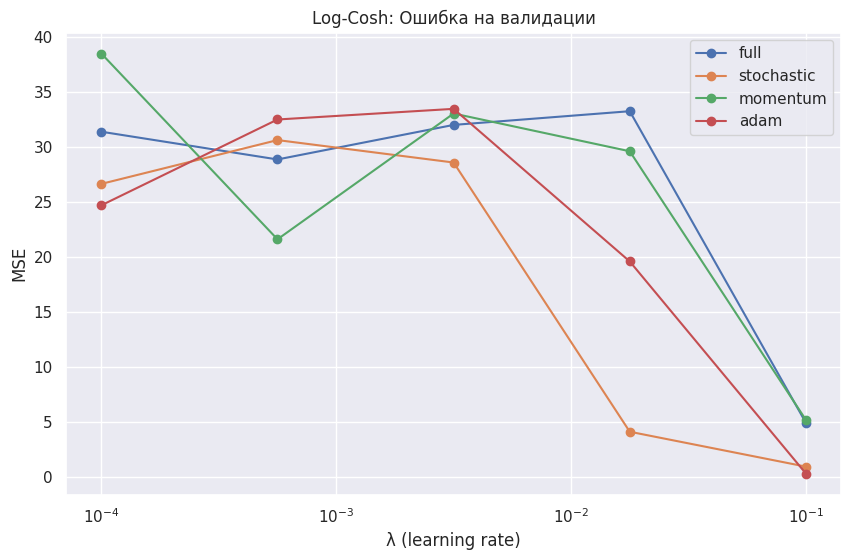

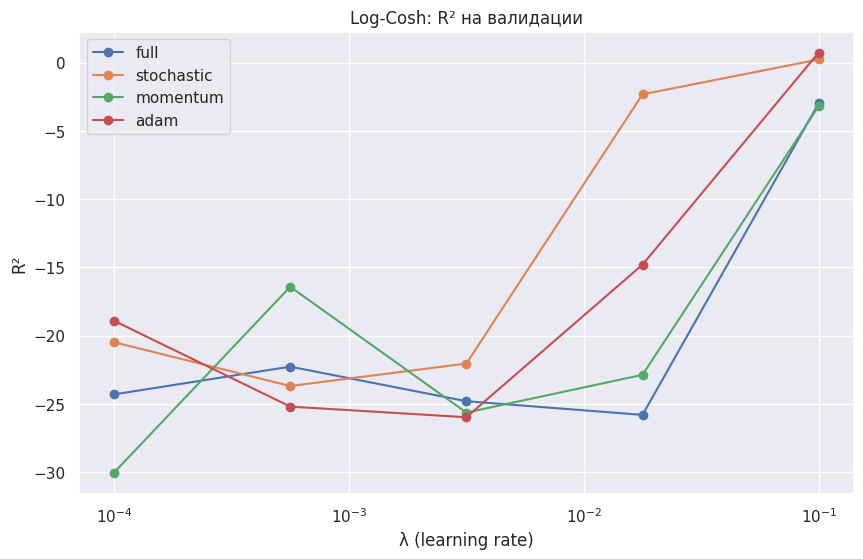

In [ ]:
for metric_name in ['val_mses', 'val_r2s']:
    plt.figure(figsize=(10, 6))
    for method in methods:
        plt.plot(
            results_logcosh[method]['lambdas'],
            results_logcosh[method][metric_name],
            label=method,
            marker='o'
        )
    plt.xscale('log')
    plt.xlabel('λ (learning rate)')
    plt.ylabel('MSE' if metric_name == 'val_mses' else 'R²')
    plt.title(f'Log-Cosh: {"Ошибка" if metric_name == "val_mses" else "R²"} на валидации')
    plt.legend()
    plt.grid(True)
    plt.show()

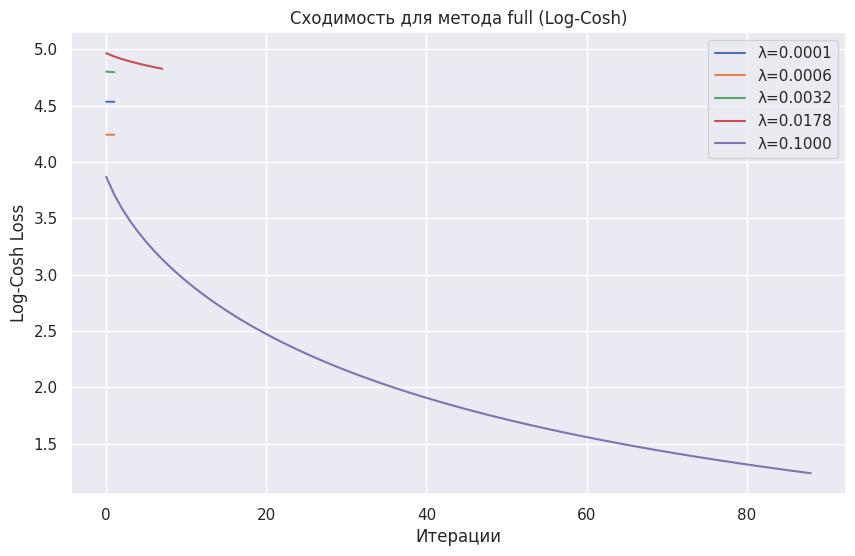

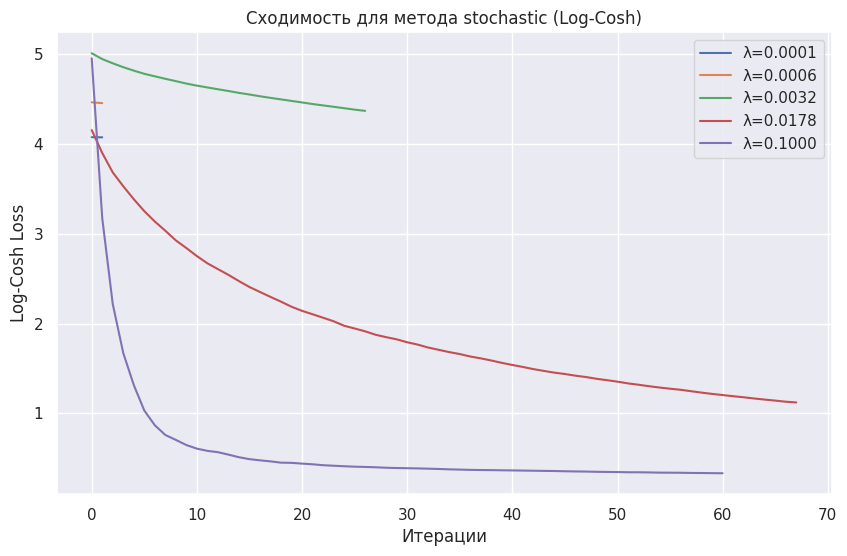

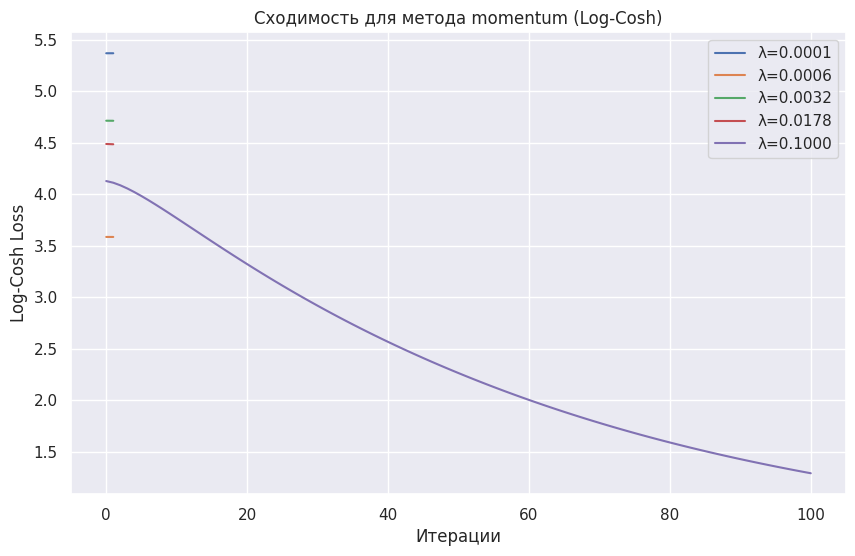

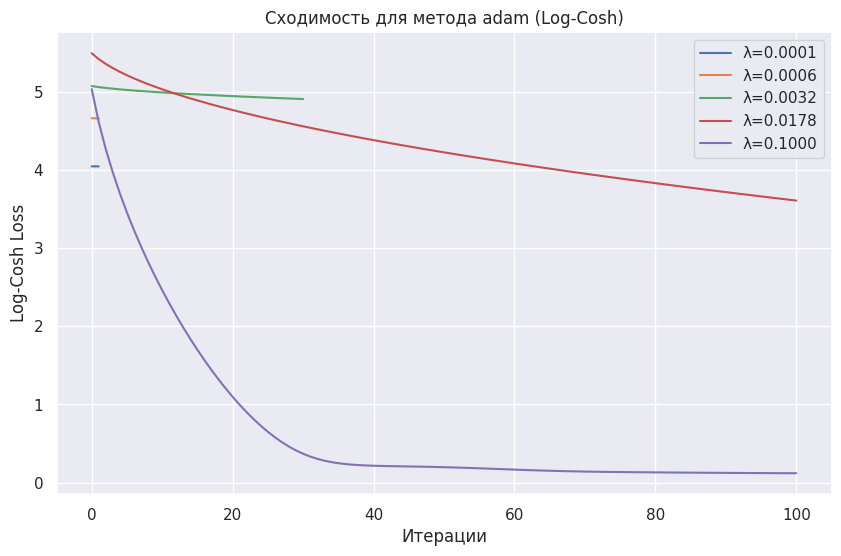

In [ ]:
for method in methods:
    plt.figure(figsize=(10, 6))
    for i, λ in enumerate(results_logcosh[method]['lambdas']):
        curve = results_logcosh[method]['loss_curves'][i]
        plt.plot(curve, label=f"λ={λ:.4f}")
    plt.xlabel("Итерации")
    plt.ylabel("Log-Cosh Loss")
    plt.title(f"Сходимость для метода {method} (Log-Cosh)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
for method in methods:
    best_idx = np.argmin(results_logcosh[method]['val_mses'])
    print(f"Метод: {method}")
    print(f"  - Лучшее λ: {results_logcosh[method]['lambdas'][best_idx]:.4f}")
    print(f"  - MSE: train={results_logcosh[method]['train_mses'][best_idx]:.4f}, val={results_logcosh[method]['val_mses'][best_idx]:.4f}")
    print(f"  - R²: train={results_logcosh[method]['train_r2s'][best_idx]:.4f}, val={results_logcosh[method]['val_r2s'][best_idx]:.4f}")
    print(f"  - Итераций до сходимости: {results_logcosh[method]['iterations'][best_idx]}")
    print()

Метод: full
  - Лучшее λ: 0.1000
  - MSE: train=4.8958, val=4.9317
  - R²: train=-2.9665, val=-2.9745
  - Итераций до сходимости: 89

Метод: stochastic
  - Лучшее λ: 0.1000
  - MSE: train=0.9354, val=0.9461
  - R²: train=0.2422, val=0.2375
  - Итераций до сходимости: 61

Метод: momentum
  - Лучшее λ: 0.1000
  - MSE: train=5.1346, val=5.1934
  - R²: train=-3.1600, val=-3.1854
  - Итераций до сходимости: 101

Метод: adam
  - Лучшее λ: 0.1000
  - MSE: train=0.3147, val=0.3166
  - R²: train=0.7450, val=0.7449
  - Итераций до сходимости: 101



Log-Cosh нормально сработала только с методом Adam — там качество почти такое же, как у MSE, просто надо больше итераций прогнать. Остальные методы — full, momentum, stochastic — с Log-Cosh вообще просели: ошибки больше, R² в минусе, модель тупит. Особенно full и momentum — полная хрень с этой функцией. А вот Adam вытянул, красавчик. Так что если юзать Log-Cosh, то только с Adam'ом, остальное не тянет.